# Skeleton sensor data model

In [2]:
from scipy.io import loadmat
import os
# os.chdir("/Users/qy/Desktop/sense_making/data/")
os.chdir("C:\\Users\\yu_quan\\Desktop\\sensor")

filename = 'Skeleton/a17_s4_t4_skeleton.mat'
mat = loadmat(filename)
mat['d_skel'].shape

(20, 3, 64)

In [6]:
import numpy as np

dat = mat['d_skel']
print(dat.shape)
print(dat[:5, 0, :5])

# dat2 = np.swapaxes(dat, 0, 2)
# print(dat2.shape)

# dat = dat.reshape(60, dat.shape[2])
dat = dat.reshape(-1, dat.shape[2])
print(dat.shape)
print(dat[:5, :5])

(20, 3, 64)
[[-0.07696016 -0.07700294 -0.07703371 -0.07705721 -0.07709071]
 [-0.08209754 -0.08210342 -0.08204667 -0.08196145 -0.08181147]
 [-0.07590193 -0.07578226 -0.07564787 -0.0755038  -0.07532212]
 [-0.0671369  -0.06701325 -0.06689188 -0.06675554 -0.06657999]
 [-0.22491577 -0.22482105 -0.22473127 -0.22465235 -0.22455449]]
(60, 64)
[[-0.07696016 -0.07700294 -0.07703371 -0.07705721 -0.07709071]
 [ 0.39861915  0.39859325  0.39857134  0.39855206  0.3985188 ]
 [ 2.87421751  2.87450552  2.87470627  2.87485576  2.87494183]
 [-0.08209754 -0.08210342 -0.08204667 -0.08196145 -0.08181147]
 [ 0.20173799  0.20174116  0.20174158  0.20174833  0.20176958]]


In [13]:
dat = mat['d_skel']
data2 = dat[:,0,:]

for n in range(1,3):
    data2 = np.vstack((data2, dat[:,n,:]))

data2.shape    

(60, 64)

### check if stacking works

In [14]:
print(dat[:5, 0, :5])

print(data2[:5, :5])

[[-0.07696016 -0.07700294 -0.07703371 -0.07705721 -0.07709071]
 [-0.08209754 -0.08210342 -0.08204667 -0.08196145 -0.08181147]
 [-0.07590193 -0.07578226 -0.07564787 -0.0755038  -0.07532212]
 [-0.0671369  -0.06701325 -0.06689188 -0.06675554 -0.06657999]
 [-0.22491577 -0.22482105 -0.22473127 -0.22465235 -0.22455449]]
[[-0.07696016 -0.07700294 -0.07703371 -0.07705721 -0.07709071]
 [-0.08209754 -0.08210342 -0.08204667 -0.08196145 -0.08181147]
 [-0.07590193 -0.07578226 -0.07564787 -0.0755038  -0.07532212]
 [-0.0671369  -0.06701325 -0.06689188 -0.06675554 -0.06657999]
 [-0.22491577 -0.22482105 -0.22473127 -0.22465235 -0.22455449]]


In [15]:
print(dat[:5, 2, :5])

print(data2[40:45, :5])

[[2.87421751 2.87450552 2.87470627 2.87485576 2.87494183]
 [2.87240958 2.87265825 2.87290812 2.87315226 2.87335992]
 [2.87534761 2.87572241 2.87607646 2.87640166 2.87669992]
 [2.82735038 2.82747817 2.82760763 2.82774448 2.82788515]
 [2.82918191 2.82971954 2.83013678 2.8304646  2.83069801]]
[[2.87421751 2.87450552 2.87470627 2.87485576 2.87494183]
 [2.87240958 2.87265825 2.87290812 2.87315226 2.87335992]
 [2.87534761 2.87572241 2.87607646 2.87640166 2.87669992]
 [2.82735038 2.82747817 2.82760763 2.82774448 2.82788515]
 [2.82918191 2.82971954 2.83013678 2.8304646  2.83069801]]


In [7]:
# normalize coord into image pixel??

print(dat[:3,:3])
print(np.floor(dat[:3,:3]))

[[-0.07696016 -0.07700294 -0.07703371]
 [ 0.39861915  0.39859325  0.39857134]
 [ 2.87421751  2.87450552  2.87470627]]
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 2.  2.  2.]]


In [20]:
data = dat[:4,:4]
print(data)
np.floor((data-data.min()) / (data.max()-data.min()) * 255)

[[-0.07696016 -0.07700294 -0.07703371 -0.07705721]
 [ 0.39861915  0.39859325  0.39857134  0.39855206]
 [ 2.87421751  2.87450552  2.87470627  2.87485576]
 [-0.08209754 -0.08210342 -0.08204667 -0.08196145]]


array([[  0.,   0.,   0.,   0.],
       [ 41.,  41.,  41.,  41.],
       [254., 254., 254., 255.],
       [  0.,   0.,   0.,   0.]])

## Treat skeleton data as images
reference: https://ieeexplore.ieee.org/document/7486569

### resize every image to 60 x 60

In [31]:
import numpy as np
from cv2 import resize
# from keras.preprocessing import sequence

X_train = []
Y_train = []
X_test = []
Y_test = []

for action in range(1, 28):
    # print(action)
    for subject in range(1, 9):
        for trial in range(1, 5):
            # data = import_inertial_data(action, subject, trial)
            filename = f'Skeleton/a{action}_s{subject}_t{trial}_skeleton.mat'
            try:
                data = loadmat(filename)['d_skel']
            except:
                continue
            
            # not right
            # data = data.reshape(60, data.shape[2])
            data2 = data[:,0,:]
            for n in range(1,3):
                data2 = np.vstack((data2, data[:,n,:]))
            data = data2
            
            # normalize coord into image pixel
            data = np.floor((data-data.min()) / (data.max()-data.min()) * 255) 
            data = resize(data, (60, 60))
            # data = sequence.pad_sequences(data, maxlen=125)
            if subject in [1, 2 ,3, 5, 6, 7] :
                X_train.append(data)
                Y_train.append(action-1)
            else:
                X_test.append(data)
                Y_test.append(action-1)
                
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (646, 60, 60)
Y_train.shape: (646,)
X_test.shape: (215, 60, 60)
Y_test.shape: (215,)


In [32]:
# One hot encoding
from keras.utils import to_categorical

# X_train = np.swapaxes(X_train, 1, 2)
# X_test = np.swapaxes(X_test, 1, 2)

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
Y_label = Y_test
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (646, 60, 60, 1)
Y_train.shape: (646, 27)
X_test.shape: (215, 60, 60, 1)
Y_test.shape: (215, 27)


In [43]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dropout, Flatten, Dense
from keras.layers.pooling import MaxPooling2D

simple_cnn = Sequential()
simple_cnn.add(BatchNormalization(input_shape = (60, 60, 1), 
                                  name = 'NormalizeInput'))
simple_cnn.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
simple_cnn.add(MaxPooling2D((3, 3) , strides = 2))
simple_cnn.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
simple_cnn.add(MaxPooling2D((3, 3) , strides = 2))
simple_cnn.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
simple_cnn.add(MaxPooling2D((3, 3) , strides = 2))
simple_cnn.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
simple_cnn.add(Flatten())
simple_cnn.add(Dense(128, activation='relu'))
simple_cnn.add(Dense(27, activation='softmax'))

simple_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                   # metrics = [dice_coef, 'acc', 'mse']
                   metrics = ['acc'])
simple_cnn.summary()

history = simple_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                   epochs=100, batch_size=128, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NormalizeInput (BatchNormali (None, 60, 60, 1)         4         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 58, 58, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 64)          0         
__________

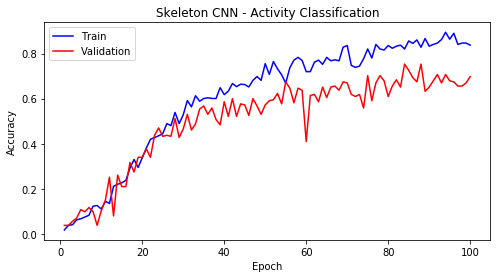

In [44]:
import matplotlib.pyplot as plt

epoch = list(range(1,101))
plt.figure(figsize=(8,4))
plt.plot(epoch, history.history['acc'], color='b')
plt.plot(epoch, history.history['val_acc'], color='r')
plt.title('Skeleton CNN - Activity Classification')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Train', 'Validation'))
plt.show()